## Circuit

Cuadernillo que tiene como objetivo montar el circuito cuantico necesario para el proyecto. 


Primero el obteivo será implementar los circuitos de la Fig1

In [20]:
from classiq import *

#authenticate(overwrite=True)

El observable será

$$
O = \frac{1}{2}(Z+I)\otimes I^{\otimes n}
$$

In [ ]:
import numpy as np
#Funcion que intentará definir la accion del operador U


@qfunc
def U_j_op( qubits: QArray[QBit], j : QNum, landa : QNum, theta : QNum):

    for i in range(j - 1): # Genera las primeras cnots
        CX(ctrl= qubits[j-1], target= qubits[i])
    

    PHASE(-landa, qubits[j-1])
    H(qubits[j-1])
    
    #multi control RZ:
    if j-1 == 0:
        RZ(theta, qubits[j-1])
        pass
    

    else:
        control(qubits[0: j-1], lambda: RZ(theta, qubits[j-1]))
        pass


    H(qubits[j-1])
    PHASE(landa, qubits[j-1])

    # Genera las ultimas cnots
    for i in range(j-2, -1, -1):
        CX(ctrl=qubits[j-1], target= qubits[i])




Tiempo = 0.0
Tiempo = 0.1
Tiempo = 0.2
Tiempo = 0.30000000000000004
Tiempo = 0.4
Tiempo = 0.5
Tiempo = 0.6000000000000001
Tiempo = 0.7000000000000001
Tiempo = 0.8
Tiempo = 0.9
Tiempo = 1.0
Tiempo = 1.1
Tiempo = 1.2000000000000002
Tiempo = 1.3
Tiempo = 1.4000000000000001
Tiempo = 1.5
Tiempo = 1.6
Tiempo = 1.7000000000000002
Tiempo = 1.8
Tiempo = 1.9000000000000001
Tiempo = 2.0
Tiempo = 2.1
Tiempo = 2.2
Tiempo = 2.3000000000000003
Tiempo = 2.4000000000000004
Tiempo = 2.5
Tiempo = 2.6
Tiempo = 2.7
Tiempo = 2.8000000000000003
Tiempo = 2.9000000000000004
Tiempo = 3.0
Tiempo = 3.1
Tiempo = 3.2
Tiempo = 3.3000000000000003
Tiempo = 3.4000000000000004
Tiempo = 3.5
Tiempo = 3.6
Tiempo = 3.7
Tiempo = 3.8000000000000003
Tiempo = 3.9000000000000004
Tiempo = 4.0
Tiempo = 4.1000000000000005
Tiempo = 4.2
Tiempo = 4.3
Tiempo = 4.4
Tiempo = 4.5
Tiempo = 4.6000000000000005
Tiempo = 4.7
Tiempo = 4.800000000000001
Tiempo = 4.9
Tiempo = 5.0
Tiempo = 5.1000000000000005
Tiempo = 5.2
Tiempo = 5.300000000000001

In [241]:



@qfunc
def main(tau: CReal, reg: Output[QArray]):
    # General Parameters:

    n = 7.0 #num qubits
     #num_trotter_steps
    L = 128 # Lenght of the domain
    v = 10.0 # advection velocity    

    dim_lattice = 2 ** n # lattice finite method partition for an arbitrary num of qubits
    l = L / (dim_lattice + 1) # optimal parameter for the rotation ev. gates
    gamma = 1/(2*l) # gamma parameter
    landa = -np.pi/2 # lambda parameter
    theta = 2 * tau * gamma * v #MCRZ gate controlled
    

    #estado inicial:
    # |u(t)> = sum u_j |j> ### j_{0}^{2**j - 1}
    allocate(n, reg)

    # we generate the lattice
    x = np.linspace(0, L, num= int(dim_lattice))

    # phi(0, x) = 1 if 1<x<2, and 0 else
    def phi_0(x):
        return np.where((20 < x) & (x < 50), 1.0, 0.0)

    # we embeded the quantum state with the initial probabilities amplitude
    u = phi_0(x)
    u /= np.linalg.norm(u)  
    prob = u.tolist()
    
    inplace_prepare_amplitudes(amplitudes= prob, #the prob dict to initialize the quantum state
                                bound= 0.00000001, #the accepted error
                                  target=reg) # the register where we initialize the quantum state
    

    #Generar 
    #seria generar la U_
    for j in range(1, int(n + 1)):
        
        
        for i in range(j - 1): # Genera las primeras cnots
            CX(ctrl=reg[j-1], target= reg[i])
        

        PHASE(-landa, reg[j-1])
        H(reg[j-1])
        
        #multi control RZ:
        if j-1 == 0:
            RZ(theta, reg[j-1])
            pass
        

        else:
            control(reg[0: j-1], lambda: RZ(theta, reg[j-1]))
            pass


        H(reg[j-1])
        PHASE(landa, reg[j-1])

        # Genera las ultimas cnots
        for i in range(j-2, -1, -1):
            CX(ctrl=reg[j-1], target= reg[i])

    


    
qmod = create_model(main, out_file= 'circuito')
qprog = synthesize(qmod)




import matplotlib.pyplot as plt

#parameters
L = 128
num_qubits =  7
dim_lattice = int(2 ** num_qubits)
x = np.linspace(0, L, int(dim_lattice))
N_shots = 10 ** 5


times= np.arange(0, 10, step= 1.0)

animation_data = np.zeros(shape= (len(times), dim_lattice))

for j, t in enumerate(times):

    print(f'Tiempo = {t}')

    es = ExecutionSession(qprog, ExecutionPreferences(num_shots= N_shots))

    result = es.sample({"tau": t})

    raw_data = result.counts

    max_valor = np.sqrt( sum(raw_data.values()) / N_shots)

    lattice_dict = {
        f'{i:07b}': np.sqrt(raw_data[f'{i:07b}'] / N_shots) / max_valor if f'{i:07b}' in raw_data.keys() else 0
        for i in range(dim_lattice)
    }


    u_function = lattice_dict.values()

    animation_data[j] = np.array(list(u_function))



    

Tiempo = 0.0
Tiempo = 1.0
Tiempo = 2.0
Tiempo = 3.0
Tiempo = 4.0
Tiempo = 5.0
Tiempo = 6.0
Tiempo = 7.0
Tiempo = 8.0
Tiempo = 9.0


El cirucito anterior es el llamado $V(\gamma\tau,\lambda)$. Este circuito cumple con lo siguiente:

$$
V(\gamma\tau,\lambda) \approx exp(-iH\tau)
$$

El error asociado está dado por:

$$
||exp(iH\tau) - V(\gamma\tau, \lambda)|| \leq \frac{\gamma^2\tau^2(n-1)}{2}

$$

El observable será

$$
O = \frac{1}{2}(Z+I)\otimes I^{\otimes n}
$$


In [242]:
animation_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.18245547, 0.18311199, 0.18294808, 0.1811077 , 0.18493242,
       0.17902514, 0.18245547, 0.18069311, 0.18171406, 0.18083141,
       0.18182409, 0.18439089, 0.18171406, 0.18319389, 0.18220867,
       0.18168654, 0.18215378, 0.18522959, 0.18281138, 0.18226355,
       0.18420098, 0.18368451, 0.18398369, 0.18240066, 0.18085906,
       0.18240066, 0.18303005, 0.18113531, 0.18297541, 0.18563405,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
    # Creacion del observable
    # O = (Z + I) tensor I^n


def generar_observable(n):
    # Definir matrices Pauli Z y la identidad I
    Z = np.array([[1, 0], [0, -1]])  # Matriz de Pauli Z
    I = np.eye(2)  # Matriz identidad de 2x2

    # Construir (Z + I)
    Z_plus_I = Z + I

    # Construir I^{\otimes n} (producto tensorial de I consigo misma n veces)
    I_tensor_n = np.eye(2 ** (n - 1))  # Identidad de dimensión 2^n x 2^n

    # Calcular O = (1/2) * (Z + I) ⊗ I^{⊗ n}
    O = 0.5 * np.kron(Z_plus_I, I_tensor_n)
    return O


IndentationError: expected an indented block after function definition on line 6 (2480603307.py, line 8)

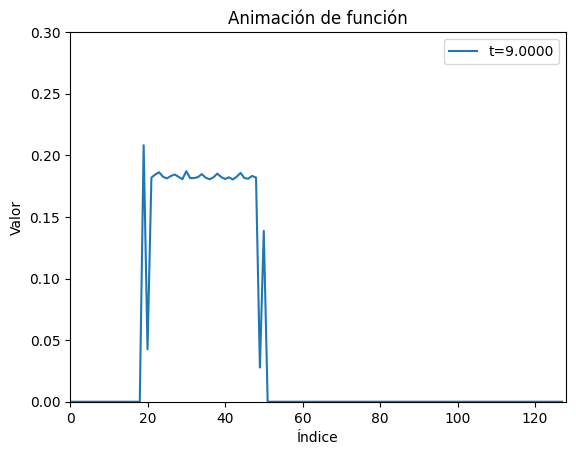

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

data = animation_data

# Crear figura y eje
fig, ax = plt.subplots()
x = np.arange(data.shape[1])  # Eje x: índices de las columnas (0 a 31)
line, = ax.plot(x, data[0, :], label="t=0")  # Inicializamos la curva

# Ajustar ejes
ax.set_ylim(0, 0.3)  # Cambia el límite según tus datos
ax.set_xlim(0, 128)
ax.set_title("Animación de función")
ax.set_xlabel("Índice")
ax.set_ylabel("Valor")
ax.legend()

# Función para actualizar la animación
def update(frame):
    line.set_ydata(data[frame, :])  # Actualizar y-values
    line.set_label(f"t={frame:.04f}")  # Actualizar etiqueta
    ax.legend()
    return line,

# Crear animación
ani = FuncAnimation(fig, update, frames=data.shape[0], interval=500, blit=True)

# Mostrar la animación en Jupyter
HTML(ani.to_jshtml())
